In [1]:
import pandas as pd 
df = pd.read_csv('../WineQT.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [3]:
df.shape

(1143, 13)

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

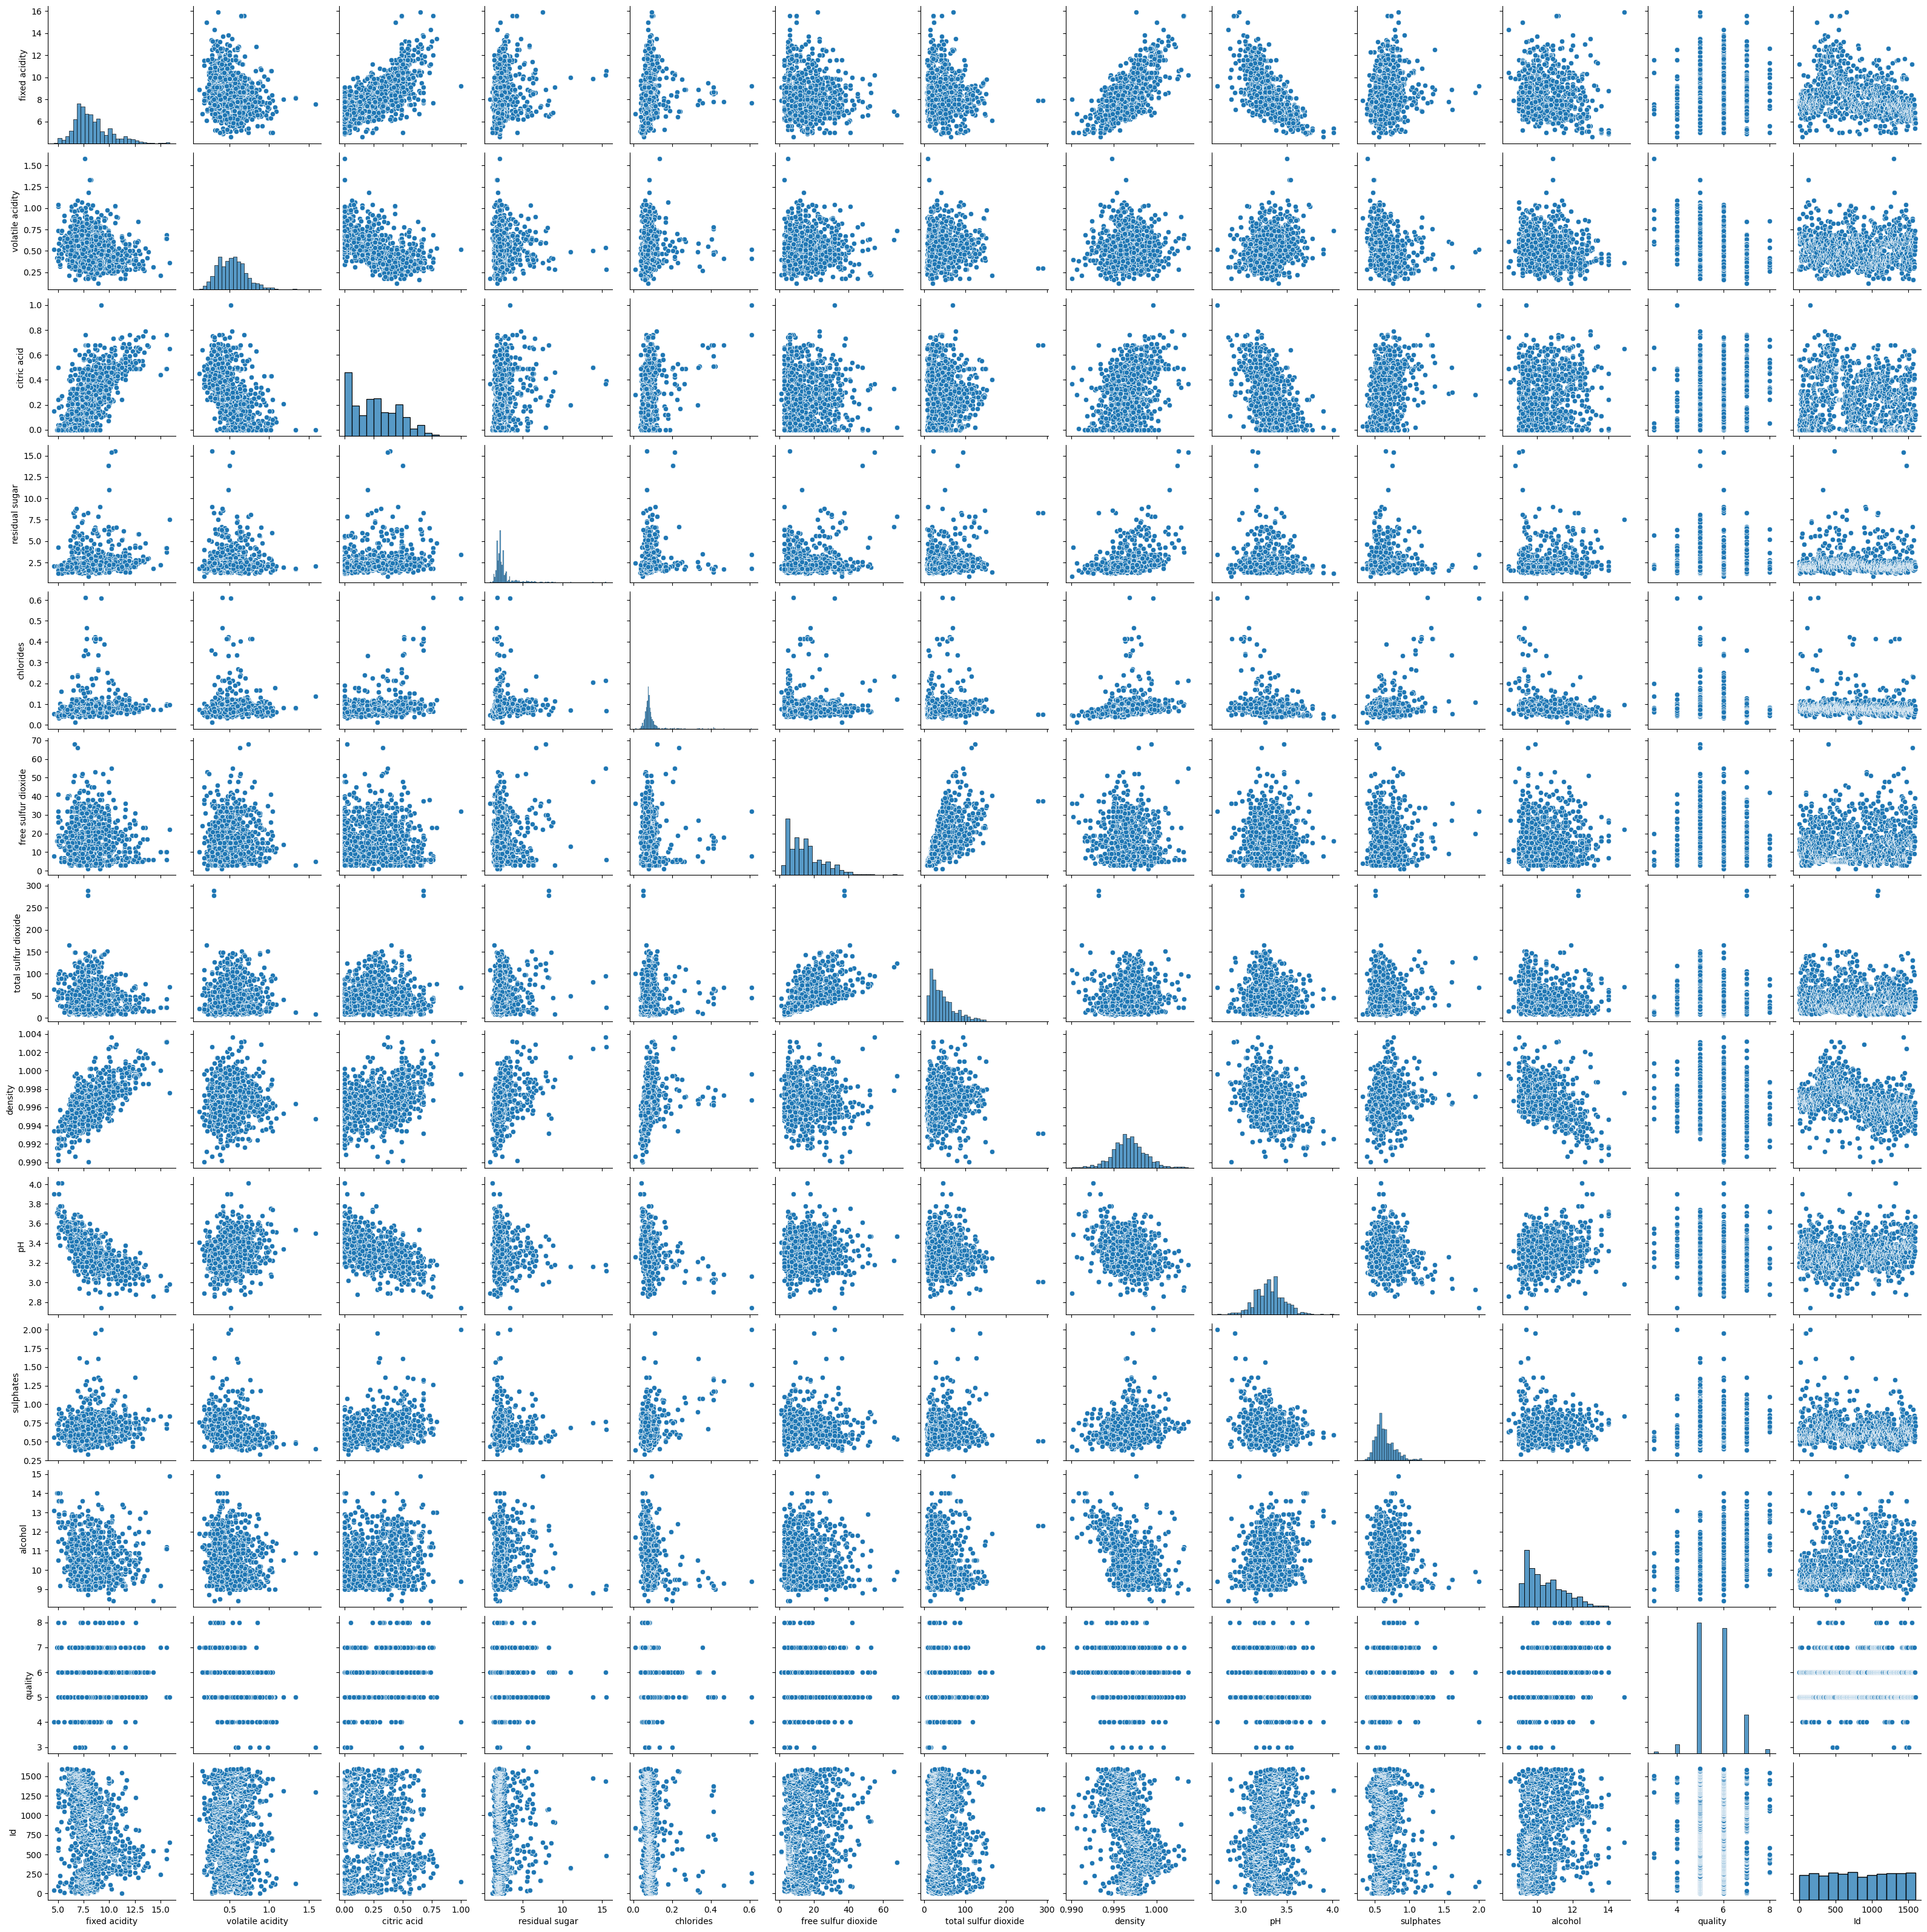

In [8]:
import seaborn as sns
sns.pairplot(df)

In [10]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data , columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'])

In [12]:
scaled_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
1         -0.292593          1.941813    -1.365027        0.050060   0.234247   
2         -0.292593          1.273492    -1.161568       -0.171289   0.107253   
3          1.653789         -1.399789     1.483400       -0.466421  -0.252560   
4         -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
...             ...               ...          ...             ...        ...   
1138      -1.151292         -0.118842    -0.703785       -0.171289  -0.231395   
1139      -0.865059          0.493785    -0.958109       -0.466421  -0.400719   
1140      -1.208538          0.382399    -0.958109       -0.392638   0.064922   
1141      -1.380278          0.103932    -0.856379       -0.245072  -0.527712   
1142      -1.380278          0.633019    -0.754650       -0.392638  -0.252560   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.450467             -0.363610  0.555854  1.270695   
1                0.915920              0.643477  0.036165 -0.708928   
2               -0.060071              0.246745  0.140103 -0.325775   
3                0.135127              0.429852  0.659792 -0.964363   
4               -0.450467             -0.363610  0.555854  1.270695   
...                   ...                   ...       ...       ...   
1138             1.306316             -0.180503 -0.514707  0.695966   
1139             1.208717             -0.241539 -0.114545  0.695966   
1140             1.599113             -0.058432 -0.951246  0.887542   
1141             2.282306              0.155192 -0.836914  1.334554   
1142             1.599113             -0.058432 -0.655023  1.653848   

      sulphates   alcohol   quality        Id  
0     -0.573658 -0.963382 -0.815724 -1.735618  
1      0.130881 -0.593601 -0.815724 -1.733462  
2     -0.045254 -0.593601 -0.815724 -1.731306  
3     -0.456235 -0.593601  0.425784 -1.729150  
4     -0.573658 -0.963382 -0.815724 -1.726993  
...         ...       ...       ...       ...  
1138   0.541862  0.515741  0.425784  1.696940  
1139   0.952843 -0.870937  0.425784  1.699096  
1140  -0.456235  0.053515 -0.815724  1.701252  
1141   0.600574  0.700632  0.425784  1.703408  
1142   0.307016 -0.223820 -0.815724  1.707720  

[1143 rows x 13 columns]

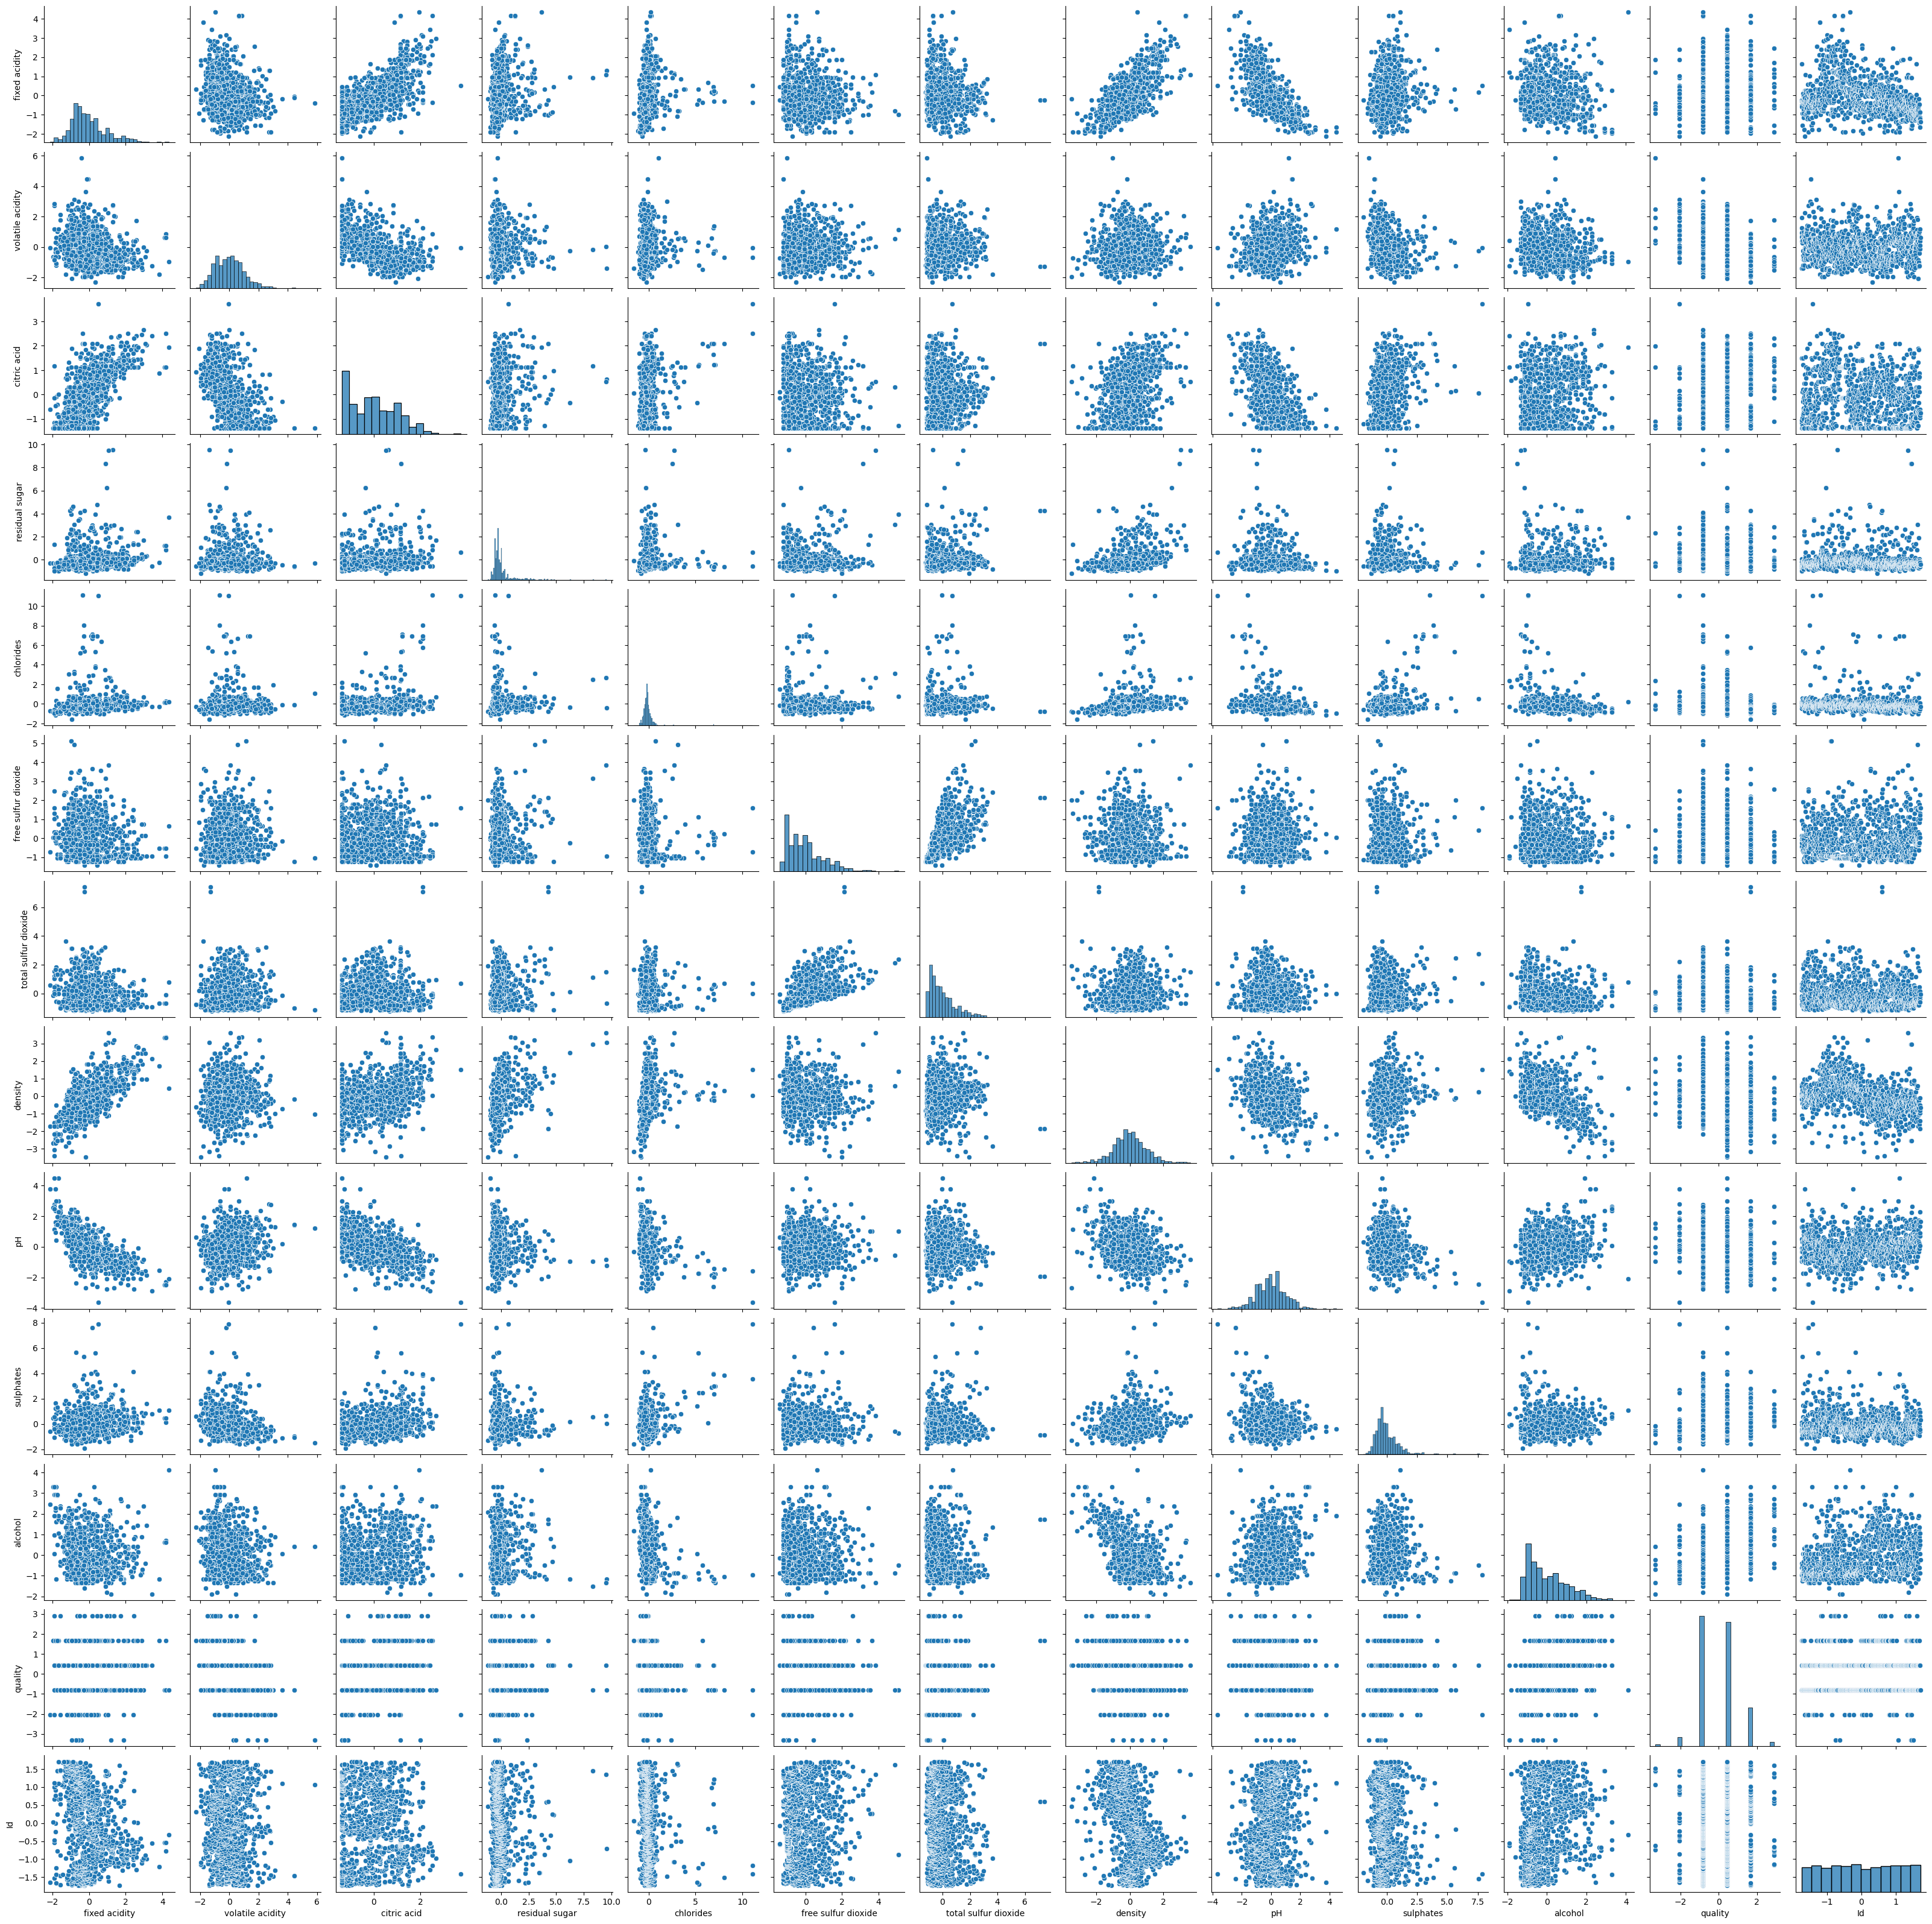

In [13]:
sns.pairplot(scaled_df)

In [19]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
pca_df = pca.fit_transform(scaled_df)
X_scaled = pd.DataFrame(pca_df , columns=['pc1','pc2'])

In [20]:
X_scaled.head()

pc1       pc2
0 -1.215133 -1.794555
1 -0.467435 -2.477990
2 -0.401695 -1.871949
3  2.645247  0.100493
4 -1.216916 -1.792910

In [16]:
print(pca.components_)


[[ 0.47750067 -0.22369614  0.44707047  0.16608228  0.21158396 -0.05584784
   0.01369381  0.39503221 -0.41520442  0.23669015 -0.1139593   0.07883684
  -0.20677085]
 [ 0.03207913 -0.38324503  0.19392824 -0.10924891 -0.15183135 -0.19774553
  -0.31130712 -0.29272457  0.02396455  0.16283452  0.49875547  0.49553927
   0.19075973]]


In [17]:
print(pca.explained_variance_)

[3.27786978 2.29330366]


In [18]:
print(pca.explained_variance_ratio_)

[0.25192323 0.17625364]


<Axes: xlabel='pc1', ylabel='pc2'>

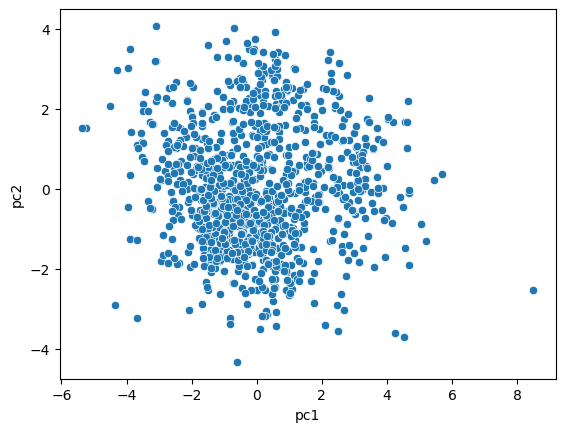

In [21]:
sns.scatterplot(data=X_scaled , x='pc1' , y='pc2')